In [215]:
import pandas as pd


0 => Non-toxic 
1 => Toxic

# **ViHOS**

In [272]:
vihos_train = pd.read_csv('data\\ViHOS\\train.csv')
vihos_dev = pd.read_csv('data\\ViHOS\\dev.csv')
vihos_test = pd.read_csv('data\\ViHOS\\test.csv')



In [273]:
vihos_train.head()

,Unnamed: 0,content,index_spans
0,0,Dừa lắm :)),[]
1,1,Bấp bênh vl thế,"[9, 10]"
2,2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,"[53, 54, 55]"
3,3,Thấy chán ad page này kiến thức thì nông cản c...,"[5, 6, 7, 8, 36, 37, 38, 39, 40, 41, 42, 43, 6..."
4,4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,[]


In [274]:
def reformat(df: pd.DataFrame, dataset_type: str):
    df = df.drop(columns=['Unnamed: 0'], axis=1)
    df['label'] = df['index_spans'].apply(lambda x: 1 if x != '[]' else 0)
    df.drop(columns=['index_spans'], inplace=True)
    df.rename(columns={'content': 'text'}, inplace=True)
    df['dataset_type'] = dataset_type
    return df 
    
    

In [275]:
vihos_train = reformat(vihos_train, 'train')
vihos_dev = reformat(vihos_dev, 'dev')
vihos_test = reformat(vihos_test, 'test')

In [220]:
vihos_train.head()

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train


In [276]:
final_df = pd.concat([vihos_train, vihos_dev, vihos_test], ignore_index= True)

In [277]:
final_df

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train
...,...,...,...
11051,từ dịch này thấy ý thức người nhật xăng đổ nửa...,1,test
11052,Đang nói chuyện này cái ổng bẻ lái qua chuyện ...,0,test
11053,Ôi trời giai cấp lđ ở ta thì đổi trắng thay đe...,1,test
11054,Đéo ai làm thế,1,test


# **ViHSD**

In [278]:
vihsd_train = pd.read_csv('data\\vihsd\\train.csv')
vihsd_dev = pd.read_csv('data\\vihsd\\dev.csv')
vihsd_test = pd.read_csv('data\\vihsd\\test.csv')


In [224]:
vihsd_train.head()

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [279]:
def reformat_vihsd(df: pd.DataFrame, dataset_type: str):
    df['label'] = df['label_id'].apply(lambda x: 0 if x == 0 else 1)
    df.drop(columns=['label_id'], inplace=True)
    df.rename(columns={'free_text': 'text'}, inplace=True)
    df['dataset_type'] = dataset_type
    return df

In [280]:
vihsd_train = reformat_vihsd(vihsd_train, 'train')
vihsd_dev = reformat_vihsd(vihsd_dev, 'dev')
vihsd_test = reformat_vihsd(vihsd_test, 'test')

In [227]:
vihsd_train

,text,label,dataset_type
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0,train
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,1,train
2,Đậu Văn Cường giờ giống thằng sida hơn à,0,train
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,1,train
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0,train
...,...,...,...
24043,Thả tim cho sự cống hiến của ngài,0,train
24044,Thua !,0,train
24045,Ở Việt Nam thì có khánh sky..hải ngoại có trần...,0,train
24046,"1:22 ai lớp du chu cờ moo, Duyên dáng quá cô ơi",0,train


In [281]:
final_df = pd.concat([final_df, vihsd_train, vihsd_dev, vihsd_test], ignore_index= True)

In [282]:
final_df

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train
...,...,...,...
44451,Nghe cũng được. Nhưng vẫn cày views,0,test
44452,Pha team up căng cực đến từ vị trí ông chủ đầm...,0,test
44453,Thanh Nhường sao m đọc đc cmt của t thế tiên s...,0,test
44454,"Đúng rồi, nhìn có ria mép , với mặt giống đàn ...",0,test


# **ViCTSD**

In [283]:
victsd_train = pd.read_csv('data\ViCTSD\ViCTSD_train.csv')
victsd_dev = pd.read_csv('data\ViCTSD\ViCTSD_valid.csv')
victsd_test = pd.read_csv('data\ViCTSD\ViCTSD_test.csv')

In [284]:
victsd_train.head()

,Unnamed: 0,Comment,Constructiveness,Toxicity,Title,Topic
0,6326,Thật tuyệt vời...!!!,0,0,Những 'bước tiến diệu kỳ' của Trúc Nhi - Diệu Nhi,SucKhoe
1,7835,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",1,0,Hình tượng Mỹ sụp đổ trong lòng người dân thế ...,TheGioi
2,4690,tôi thấy người lái xe hơi bấm còi mới là người...,1,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
3,6011,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,0,11 ngày không lây nhiễm nCoV cộng đồng,SucKhoe
4,9303,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,0,5 trẻ chết đuối dưới ao,ThoiSu


In [285]:
def reformat_victsd(df: pd.DataFrame, dataset_type: str):
    df.drop(axis= 1, columns= ['Unnamed: 0', 'Constructiveness', 'Title', 'Topic'], inplace= True)
    df.rename(columns= {'Comment': 'text', 'Toxicity': 'label'}, inplace= True)
    df['dataset_type'] = dataset_type
    return df

In [286]:
victsd_train = reformat_victsd(victsd_train, 'train')
victsd_dev = reformat_victsd(victsd_dev, 'dev')
victsd_test = reformat_victsd(victsd_test, 'test')

In [234]:
victsd_train.head()

,text,label,dataset_type
0,Thật tuyệt vời...!!!,0,train
1,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",0,train
2,tôi thấy người lái xe hơi bấm còi mới là người...,1,train
3,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,train
4,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,train


In [287]:
final_df = pd.concat([final_df, victsd_train, victsd_dev, victsd_test], ignore_index= True)

In [288]:
final_df

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train
...,...,...,...
54451,biệt thự nhà riêng to đùng thế kia mà chủ (hay...,1,test
54452,"Trong cái khó ló cái khôn, người tài thật sự k...",0,test
54453,Bánh trung thu sao lại phải có quả trứng muối ...,0,test
54454,Cấp 1 nói chung và lớp 1 nói riêng theo tôi có...,0,test


# **Phản động dataset**

In [289]:
import pandas as pd
pd_train = pd.read_csv('data\Our corpus\phan-dong\\train_data.csv')
pd_dev = pd.read_csv('data\Our corpus\phan-dong\\valid_data.csv')
pd_test = pd.read_csv('data\Our corpus\phan-dong\\test_data.csv')

In [291]:
pd_train.head(2)

,Unnamed: 0.1,Unnamed: 0,url,content,label,checked,content_normalize,length,combine_text,text,text_split
0,935,935,https://www.facebook.com/RFIvi/posts/pfbid0Fq2...,crimée bị sáp nhập sự ra đời của chủ nghĩa đế ...,0,log,crim e b s p nh p s ra i c a ch ngh a qu c nga...,50,['crimée bị sáp_nhập sự ra_đời của chủ_nghĩa_đ...,crimée bị sáp_nhập sự ra_đời của chủ_nghĩa_đế_...,"['crimée', 'bị', 'sáp_nhập', 'sự', 'ra_đời', '..."
1,2128,2128,https://www.facebook.com/vtcnewsvn/posts/pfbid...,góc ý kiến: nhiều người 'đi làm như đi chơi' n...,0,Chính phủ,g c ki n nhi u ng i i l m nh i ch i nh ng c i ...,253,['góc ý_kiến : nhiều người \' đi làm như đi ch...,góc ý_kiến nhiều người đi làm như đi chơi ...,"['góc', 'ý_kiến', 'nhiều', 'người', 'đi', 'làm..."


In [292]:
def phan_dong_reformat(df: pd.DataFrame, dataset_type: str):
    df.drop(axis= 1, columns= ['Unnamed: 0', 'Unnamed: 0.1', 'url', 'checked', 'content_normalize', 'length', 'combine_text', 'text', 'text_split'], inplace= True)
    df.rename(columns= {'content': 'text'}, inplace= True)
    df['dataset_type'] = dataset_type
    return df

In [293]:
pd_train = phan_dong_reformat(pd_train, 'train')
pd_dev = phan_dong_reformat(pd_dev, 'dev')
pd_test = phan_dong_reformat(pd_test, 'test')

In [241]:
pd_train

,text,label,dataset_type
0,crimée bị sáp nhập sự ra đời của chủ nghĩa đế ...,0,train
1,góc ý kiến: nhiều người 'đi làm như đi chơi' n...,0,train
2,sự kiện formosa đứng đầu các vụ gây ô nhiễm nă...,1,train
3,minh bạch thị trường nhà đất hay khua chiêng t...,1,train
4,"lần đầu tiên sau gần 40 năm, việt nam chính th...",0,train
...,...,...,...
3011,"Việt Nam, đất nước đầy những vết thương đẫm má...",1,train
3012,ukraine từ chối trung quốc viện trợ trước sự p...,0,train
3013,đi lính mà thế này đây! cha mẹ nên xem để biết...,0,train
3014,dịp hiếm ngắm nhìn chim uyên ương khi du xuân ...,0,train


In [242]:
pd_test

,text,label,dataset_type
0,khách tham quan muốn leo núi phú sĩ ở nhật bản...,0,test
1,"hà nội yêu cầu các quận, huyện, thị xã nghiên ...",0,test
2,những người ủng hộ ông recep tayyip erdogan đã...,0,test
3,barbie tôn vinh nhà khoa học vũ trụ ts maggie ...,0,test
4,bộ thông tin và truyền thông thanh tra toàn di...,0,test
...,...,...,...
1880,dương quang thành là chủ tịch tập đoàn điện lự...,0,test
1881,a lô chào buổi sáng nhận được phản ánh của hơn...,0,test
1882,mình vừa tình cờ xem được buổi trò chuyện với ...,0,test
1883,tại lễ trao giải của lhp berlin (berlinale) 20...,0,test


In [243]:
pd_test.head()

,text,label,dataset_type
0,khách tham quan muốn leo núi phú sĩ ở nhật bản...,0,test
1,"hà nội yêu cầu các quận, huyện, thị xã nghiên ...",0,test
2,những người ủng hộ ông recep tayyip erdogan đã...,0,test
3,barbie tôn vinh nhà khoa học vũ trụ ts maggie ...,0,test
4,bộ thông tin và truyền thông thanh tra toàn di...,0,test


In [294]:

final_df = pd.concat([final_df, pd_train, pd_dev, pd_test], ignore_index=True)


In [295]:
final_df

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train
...,...,...,...
61237,dương quang thành là chủ tịch tập đoàn điện lự...,0,test
61238,a lô chào buổi sáng nhận được phản ánh của hơn...,0,test
61239,mình vừa tình cờ xem được buổi trò chuyện với ...,0,test
61240,tại lễ trao giải của lhp berlin (berlinale) 20...,0,test


In [296]:
pd_train = pd.read_csv('data\\train_df.csv')
pd_dev = pd.read_csv('data\\val_df.csv')
pd_test = pd.read_csv('data\\test_df.csv')

In [247]:
pd_train

,cmt_col,labels
0,cặc,1.0
1,đr hết thời cày rank bk còn ngợp,0.0
2,Diễn viên hô ni hút mà ngại gì mấy khác kk,0.0
3,Toàn bọn vô công rồi nghề ngồi sủa ăn lương th...,2.0
4,lên kim cương bố ỉa vào mồm mày với cái lối lê...,1.0
...,...,...
5161,Đánh ngu đẩy láo chết hét cái đầu buồi,2.0
5162,xinh mà ngu,1.0
5163,Trần ThanhThảo Tuyết Hoa bớt nc vs zai lạ,0.0
5164,Cái tội thích trai đẹp,0.0


In [297]:
def reformat_vihsd(df: pd.DataFrame, dataset_type: str):
    df['label'] = df['labels'].apply(lambda x: 0 if x == 0 else 1)
    df.drop(columns=['labels'], inplace=True)
    df.rename(columns={'cmt_col': 'text'}, inplace=True)
    df['dataset_type'] = dataset_type
    return df

In [298]:
pd_train = reformat_vihsd(pd_train, 'train')
pd_dev = reformat_vihsd(pd_dev, 'dev')
pd_test = reformat_vihsd(pd_test, 'test')

In [250]:
pd_train

,text,label,dataset_type
0,cặc,1,train
1,đr hết thời cày rank bk còn ngợp,0,train
2,Diễn viên hô ni hút mà ngại gì mấy khác kk,0,train
3,Toàn bọn vô công rồi nghề ngồi sủa ăn lương th...,1,train
4,lên kim cương bố ỉa vào mồm mày với cái lối lê...,1,train
...,...,...,...
5161,Đánh ngu đẩy láo chết hét cái đầu buồi,1,train
5162,xinh mà ngu,1,train
5163,Trần ThanhThảo Tuyết Hoa bớt nc vs zai lạ,0,train
5164,Cái tội thích trai đẹp,0,train


In [299]:
final_df = pd.concat([final_df, pd_train, pd_dev, pd_test], ignore_index= True)

In [300]:
final_df

,text,label,dataset_type
0,Dừa lắm :)),0,train
1,Bấp bênh vl thế,1,train
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1,train
3,Thấy chán ad page này kiến thức thì nông cản c...,1,train
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0,train
...,...,...,...
68617,hợp lý kkkk,0,test
68618,Ông phải vì Việt Nam chứ ông vì ông nhiều quá ...,0,test
68619,Ủng hộ cty làm tới cùng cho sáng tỏ sự việc,0,test
68620,Cá chết là do đéo biết bơi có thế thôi cũng họ...,1,test


Data crawl


In [301]:

df2 = pd.read_excel('D:\Toxicity\data\Tuấn.xlsx')

df3 = pd.read_excel('D:\Toxicity\data\Chân trời mới Label - Phản động.xlsx')
df4 = pd.read_csv('data\\Phản động.csv')
df5 = pd.read_excel('D:\Toxicity\data\Kiệt1.xlsx')
df6 = pd.read_excel('D:\Toxicity\kiệt gemini_label.xlsx')


In [254]:
df2

,text,label
0,Ủng hộ em TP,0.0
1,Ủng hộ em toàn nha,0.0
2,Toàn,0.0
3,ỦNG HỘ CÁC DV NHẤT VẪN LÀ TOÀN P,0.0
4,Toàn phan lúc nào diễn đạt quá nhé,0.0
...,...,...
2938,NaN,0.0
2939,Cường cầm rất tuyệt vời nhất luôn,0.0
2940,Tại e mặc váy đị chứ mặc quần thì ai nhìn làm ...,0.0
2941,NaN,0.0


In [255]:
df3

,text,label
0,Vị đội trưởng CSGT Tuần Giáo liên tục được réo...,1
1,"Muốn hòa giải dân tộc, trước hết trả tự do cho...",1
2,Nhận xét chính xác:\nNhìn vào thực tế hiện nay...,1
3,"Nửa đầu năm 2024, lỗ lũy kế của EVN 52.016 tỷ ...",1
4,Làm gì cũng lỗ hết trơn\nChức quyền sống ch*t ...,1
...,...,...
1499,Một số dân thất nghiệp ở tỉnh Thái Nguyên có t...,0
1500,Những người phát hiện ra cờ vàng trong các hìn...,0
1501,NGÂN HÀNG SCB: VẪN CÒN CHƠI LUẬT GIANG HỒ\n\nĐ...,1
1502,Tin đồn… có thật\n\nTừ những lần kinh nghiệm x...,1


In [256]:
df4

,text,label
0,Vị đội trưởng CSGT Tuần Giáo liên tục được réo...,1.0
1,"Muốn hòa giải dân tộc, trước hết trả tự do cho...",1.0
2,Nhận xét chính xác:\nNhìn vào thực tế hiện nay...,1.0
3,"Nửa đầu năm 2024, lỗ lũy kế của EVN 52.016 tỷ ...",1.0
4,Làm gì cũng lỗ hết trơn\nChức quyền sống ch*t ...,1.0
...,...,...
1998,Ngay lúc này cuộc biểu tình chống Trung Quốc đ...,0.0
1999,Cần gì phải làm màu… đúng chất bản lĩnh của ch...,1.0
2000,Cuba từ một nước giàu đẹp bậc nhất vùng Caribe...,0.0
2001,Có bao nhiêu LÀNG NỦ ở Việt Nam?,1.0


In [257]:
df5

,text,label
0,"Qua đường thì qua,không qua thì thôi.chạy ra g...",1.0
1,Địt mẹ thằng xe máy nhìn kiểu nó sang đường đã...,1.0
2,DM xe tải nó chạy như cướp,1.0
3,"Có câu Nhường tốc độ không nhường đường, xe má...",1.0
4,Thăng xe máy biết sai nó lật đật chuồn sợ mang...,0.0
...,...,...
1599,Giang Lee cái này chủ động phòng tránh đc mà c...,1.0
1600,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0
1601,Giang Lee nhóc cái cc rồi đm có sân chơi cho m...,1.0
1602,Mạnh Nam thế m bl câu cc vô để oai à,1.0


In [258]:
df6

,text,label,gemini_label
0,"Qua đường thì qua,không qua thì thôi.chạy ra g...",1.0,1
1,Địt mẹ thằng xe máy nhìn kiểu nó sang đường đã...,1.0,1
2,DM xe tải nó chạy như cướp,1.0,1
3,"Có câu Nhường tốc độ không nhường đường, xe má...",1.0,1
4,Thăng xe máy biết sai nó lật đật chuồn sợ mang...,0.0,1
...,...,...,...
1599,cái này chủ động phòng tránh đc mà cứ mang ra ...,1.0,3
1600,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0,3
1601,nhóc cái cc rồi đm có sân chơi cho môn này ko ...,1.0,3
1602,thế m bl câu cc vô để oai à,1.0,3


In [302]:
df = pd.concat([df3, df2, df4, df5, df6], ignore_index= True)

In [303]:
df

,text,label,gemini_label
0,Vị đội trưởng CSGT Tuần Giáo liên tục được réo...,1.0,NaN
1,"Muốn hòa giải dân tộc, trước hết trả tự do cho...",1.0,NaN
2,Nhận xét chính xác:\nNhìn vào thực tế hiện nay...,1.0,NaN
3,"Nửa đầu năm 2024, lỗ lũy kế của EVN 52.016 tỷ ...",1.0,NaN
4,Làm gì cũng lỗ hết trơn\nChức quyền sống ch*t ...,1.0,NaN
...,...,...,...
9653,cái này chủ động phòng tránh đc mà cứ mang ra ...,1.0,3
9654,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0,3
9655,nhóc cái cc rồi đm có sân chơi cho môn này ko ...,1.0,3
9656,thế m bl câu cc vô để oai à,1.0,3


In [304]:
final_df = pd.concat([final_df, df], ignore_index= True)

In [305]:
final_df

,text,label,dataset_type,gemini_label
0,Dừa lắm :)),0.0,train,NaN
1,Bấp bênh vl thế,1.0,train,NaN
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1.0,train,NaN
3,Thấy chán ad page này kiến thức thì nông cản c...,1.0,train,NaN
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0.0,train,NaN
...,...,...,...,...
78275,cái này chủ động phòng tránh đc mà cứ mang ra ...,1.0,NaN,3
78276,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0,NaN,3
78277,nhóc cái cc rồi đm có sân chơi cho môn này ko ...,1.0,NaN,3
78278,thế m bl câu cc vô để oai à,1.0,NaN,3


In [271]:
final_df.drop(axis= 1, columns= ['dataset_type', "gemini_label"])

,text,label
0,Dừa lắm :)),0.0
1,Bấp bênh vl thế,1.0
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1.0
3,Thấy chán ad page này kiến thức thì nông cản c...,1.0
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0.0
...,...,...
87279,"Trịnh Đình đá bóng thì ra sân bóng, lướt ván t...",0.0
87280,Dân người ta gồng mình chống lũ còn mấy con đi...,1.0
87281,Đang Nguyễn 100% tui đụng trúng bạn là do lỗi ...,0.0
87282,Nguyen Trang v m nhìn thấy k có xe m qua đường...,0.0


In [307]:
import pandas as pd

# Giả sử final_df đã được định nghĩa và có cột 'text'

# Xóa các dòng có giá trị NaN trong cột 'text'
final_df = final_df.dropna(subset=['text'])

# Kiểm tra lại DataFrame
final_df


,text,label,dataset_type,gemini_label
0,Dừa lắm :)),0.0,train,NaN
1,Bấp bênh vl thế,1.0,train,NaN
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1.0,train,NaN
3,Thấy chán ad page này kiến thức thì nông cản c...,1.0,train,NaN
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0.0,train,NaN
...,...,...,...,...
78275,cái này chủ động phòng tránh đc mà cứ mang ra ...,1.0,NaN,3
78276,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0,NaN,3
78277,nhóc cái cc rồi đm có sân chơi cho môn này ko ...,1.0,NaN,3
78278,thế m bl câu cc vô để oai à,1.0,NaN,3


In [309]:
final_df = final_df.drop(columns=['dataset_type'])


In [310]:
final_df

,text,label
0,Dừa lắm :)),0.0
1,Bấp bênh vl thế,1.0
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1.0
3,Thấy chán ad page này kiến thức thì nông cản c...,1.0
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0.0
...,...,...
78275,cái này chủ động phòng tránh đc mà cứ mang ra ...,1.0
78276,"Cương Nguyễn thì ai bảo ko đâu, vấn đề ở đây l...",1.0
78277,nhóc cái cc rồi đm có sân chơi cho môn này ko ...,1.0
78278,thế m bl câu cc vô để oai à,1.0


In [311]:
final_df.to_csv('final_df.csv', index=False)


In [265]:
import pandas as pd

# Giả sử final_df đã được định nghĩa và có cột 'text'

# Xóa các dòng có giá trị NaN trong cột 'text'
final_df = final_df.dropna(subset=['text'])

# Chuyển tất cả giá trị trong cột 'text' thành chuỗi
final_df['text'] = final_df['text'].astype(str)

# Tách từ và loại bỏ từ trùng lặp
unique_words = set()

# Lặp qua từng dòng trong cột 'text'
for text in final_df['text']:
    words = text.split()  # Tách từ
    unique_words.update(words)  # Thêm từ vào tập hợp

# Tính số lượng từ vựng
vocabulary_size = len(unique_words)
print("Số lượng từ vựng:", vocabulary_size)


Số lượng từ vựng: 75040


In [266]:
from sklearn.model_selection import train_test_split

# Giả sử df là DataFrame cần chia
train, temp = train_test_split(df, test_size=0.2, random_state=42)  # 70% train, 30% temp
val, test = train_test_split(temp, test_size=0.5, random_state=42)  # 15% val, 15% test

print(f'Số lượng mẫu trong tập train: {len(train)}')
print(f'Số lượng mẫu trong tập val: {len(val)}')
print(f'Số lượng mẫu trong tập test: {len(test)}')


Số lượng mẫu trong tập train: 7726
Số lượng mẫu trong tập val: 966
Số lượng mẫu trong tập test: 966


In [267]:
# Thêm cột 'dataset_type' với giá trị tương ứng cho từng tập
train['dataset_type'] = 'train'
val['dataset_type'] = 'dev'
test['dataset_type'] = 'test'

final_df = pd.concat([final_df, train, val, test], ignore_index= True)


In [268]:
final_df

,text,label,dataset_type,gemini_label
0,Dừa lắm :)),0.0,train,NaN
1,Bấp bênh vl thế,1.0,train,NaN
2,Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...,1.0,train,NaN
3,Thấy chán ad page này kiến thức thì nông cản c...,1.0,train,NaN
4,Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa,0.0,train,NaN
...,...,...,...,...
87279,"Trịnh Đình đá bóng thì ra sân bóng, lướt ván t...",0.0,test,NaN
87280,Dân người ta gồng mình chống lũ còn mấy con đi...,1.0,test,NaN
87281,Đang Nguyễn 100% tui đụng trúng bạn là do lỗi ...,0.0,test,NaN
87282,Nguyen Trang v m nhìn thấy k có xe m qua đường...,0.0,test,NaN


In [213]:
df_cleaned.to_csv('dataset_preprocessing1.csv', index=False)
!python -m text_dedup.minhash \
   --path "/workspace/thviet/LLMs/Monolingual/Pre-training/De-duplication/vnu-dataset/Web crawl" \
   --split "train" \
   --data_files "dataset_preprocessing1.csv"\
   --cache_dir "./cache" \
   --output "/workspace/thviet/LLMs/Monolingual/Pre-training/De-duplication/vnu-output" \
   --column "text" \
   --num_perm 256\
   --threshold 0.7\
   --batch_size 10000 

NameError: name 'df_cleaned' is not defined

NameError: name 'df_cleaned' is not defined

In [1]:
import pandas as pd
df = pd.read_csv('final_data_dedup.csv')
df

,Unnamed: 0.1,Unnamed: 0,text,label,dataset_type
0,3210,3210,sản_phẩm 1 giáo_dục thối_nát,1.0,train
1,3562,3562,toang,0.0,train
2,4073,4073,fan cứng,0.0,train
3,4215,4215,hehe,0.0,train
4,4464,4464,thay_vì xàm lồn,1.0,train
...,...,...,...,...,...
61647,96423,96423,trận bão_lụt phơi_bày hàng_loạt bê_bối tham_nh...,1.0,test
61648,96424,96424,chí phim,0.0,test
61649,96425,96425,tận đồng_nai tiếng pô. tiếng rằm,0.0,test
61650,96426,96426,nam hoang tai đéo,1.0,test


In [2]:
# Giả sử df là DataFrame của bạn
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'dataset_type'], axis=1)

# Kiểm tra lại DataFrame sau khi xóa cột
df.head(10)


,text,label
0,sản_phẩm 1 giáo_dục thối_nát,1.0
1,toang,0.0
2,fan cứng,0.0
3,hehe,0.0
4,thay_vì xàm lồn,1.0
5,lê_quang trường đi,0.0
6,oi,0.0
7,fan cứng nè,0.0
8,xạo lồn,1.0
9,bóng dơ,1.0


In [56]:
df

,text,label
0,sản_phẩm 1 giáo_dục thối_nát,1.0
1,toang,0.0
2,fan cứng,0.0
3,hehe,0.0
4,thay_vì xàm lồn,1.0
...,...,...
61647,trận bão_lụt phơi_bày hàng_loạt bê_bối tham_nh...,1.0
61648,chí phim,0.0
61649,tận đồng_nai tiếng pô. tiếng rằm,0.0
61650,nam hoang tai đéo,1.0


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Giả sử df là DataFrame của bạn
# Đầu tiên chia df thành train và test
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Sau đó chia temp_df thành val và test
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Lưu các tập dữ liệu dưới dạng CSV
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

print("Tập dữ liệu đã được chia thành công và lưu dưới dạng CSV.")


Tập dữ liệu đã được chia thành công và lưu dưới dạng CSV.


## Machine Learning Approach SVM

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Đọc dữ liệu từ tệp CSV
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')
train_df  = train_df.dropna(subset=['text'])
val_df  = val_df.dropna(subset=['text'])
test_df  = test_df.dropna(subset=['text'])

# Chia dữ liệu đầu vào và nhãn từ các tập
X_train = train_df['text']  # Cột văn bản trong tập train
y_train = train_df['label']  # Cột nhãn trong tập train

X_val = val_df['text']  # Cột văn bản trong tập val
y_val = val_df['label']  # Cột nhãn trong tập val

X_test = test_df['text']
y_test = test_df['label']


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Tạo pipeline với TfidfVectorizer và SVM (SVC)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Trích xuất đặc trưng từ văn bản sử dụng TF-IDF
    ('classifier', SVC(C=1000.0, gamma=0.001, kernel='rbf'))  # Mô hình SVM với kernel RBF
])

# Huấn luyện mô hình trên tập train
pipeline.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val = pipeline.predict(X_val)

# Đánh giá hiệu suất của mô hình
print("Accuracy on validation set:", accuracy_score(y_val, y_pred_val))
print("Classification report on validation set:")
print(classification_report(y_val, y_pred_val))


Accuracy on validation set: 0.8584169453734671
Classification report on validation set:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      3938
         1.0       0.78      0.65      0.71      1444

    accuracy                           0.86      5382
   macro avg       0.83      0.79      0.81      5382
weighted avg       0.85      0.86      0.85      5382



In [6]:
# Dự đoán trên tập test
y_pred_test = pipeline.predict(X_test)

# Đánh giá hiệu suất trên tập test
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))


Accuracy on test set: 0.8664065403195838
Classification report on test set:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      3952
         1.0       0.80      0.66      0.73      1430

    accuracy                           0.87      5382
   macro avg       0.84      0.80      0.82      5382
weighted avg       0.86      0.87      0.86      5382



In [7]:
accuracy_score(y_test, y_pred_test)

0.8664065403195838

Confusion Matrix:
 [[3713  239]
 [ 480  950]]
F1 - micro: 0.8664065403195838
F1 - macro: 0.8185963602150879
Accuracy: 0.8664065403195838


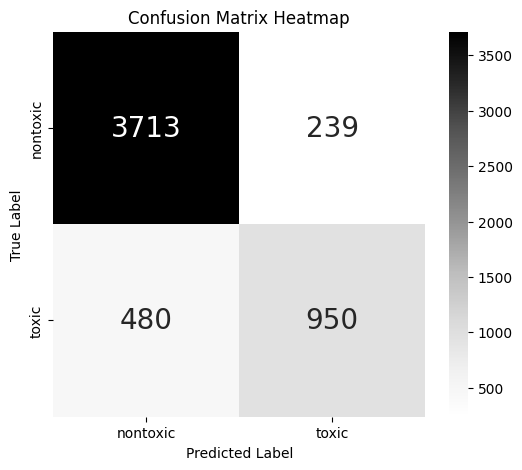

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Tạo ma trận nhầm lẫn (Confusion Matrix)
cf1 = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cf1)

# Tính F1-score (micro và macro)
f1_micro = f1_score(y_test, y_pred_test, average='micro')
f1_macro = f1_score(y_test, y_pred_test, average='macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

# Vẽ heatmap cho ma trận nhầm lẫn
df_cm1 = pd.DataFrame(cf1, index=["nontoxic", "toxic"], 
                      columns=["nontoxic", "toxic"])

plt.figure(figsize=(6, 5))
sn.heatmap(df_cm1, annot=True, cmap="Greys", fmt='g', cbar=True, annot_kws={"size": 20})
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Kết quả của bạn cho thấy hiệu suất của mô hình phân loại là khá tốt. Dưới đây là một số thông tin chi tiết về từng chỉ số:

1. **Ma trận nhầm lẫn (Confusion Matrix)**:
   ```
   [[3098  267]
    [ 505  809]]
   ```
   - **3098**: Số lượng mẫu được dự đoán đúng là **nontoxic** và thực tế cũng là **nontoxic** (True Negative).
   - **267**: Số lượng mẫu được dự đoán là **toxic** nhưng thực tế là **nontoxic** (False Positive).
   - **505**: Số lượng mẫu được dự đoán là **nontoxic** nhưng thực tế là **toxic** (False Negative).
   - **809**: Số lượng mẫu được dự đoán đúng là **toxic** và thực tế cũng là **toxic** (True Positive).

2. **F1 - micro**: 
   - Giá trị là **0.835**. F1 - micro tính toán điểm F1 bằng cách tổng hợp tất cả các giá trị đúng, sai trên toàn bộ tập dữ liệu, phù hợp hơn khi có sự không cân bằng giữa các lớp.

3. **F1 - macro**: 
   - Giá trị là **0.783**. F1 - macro tính toán F1 cho mỗi lớp và tính trung bình, không quan tâm đến kích thước của lớp. Điều này cho thấy mô hình có thể hoạt động tốt với lớp **toxic** nhưng có thể không tốt bằng với lớp **nontoxic**.

4. **Accuracy**: 
   - Giá trị là **0.835**. Đây là tỷ lệ chính xác của mô hình, cho biết 83.5% các dự đoán của mô hình là đúng.

### Kết luận:
- Mô hình của bạn hoạt động tốt với tỷ lệ chính xác cao và điểm F1 cho thấy rằng mô hình có thể dự đoán chính xác cả hai lớp **toxic** và **nontoxic**. 
- Tuy nhiên, bạn có thể xem xét cải thiện thêm hiệu suất của mô hình bằng cách kiểm tra các siêu tham số khác hoặc áp dụng các phương pháp tiền xử lý khác để xử lý các mẫu bị phân loại sai.

## ML Approach - Randomforest

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Tạo pipeline với TfidfVectorizer và Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Feature extraction using TF-IDF
    ('classifier', RandomForestClassifier(n_estimators=108, max_depth=400))  # Random Forest Classifier
])

# Huấn luyện mô hình trên tập train
pipeline.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val = pipeline.predict(X_val)

# Đánh giá hiệu suất của mô hình
print("Accuracy on validation set:", accuracy_score(y_val, y_pred_val))
print("Classification report on validation set:")
print(classification_report(y_val, y_pred_val))


Accuracy on validation set: 0.8522853957636566
Classification report on validation set:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      3938
         1.0       0.82      0.58      0.68      1444

    accuracy                           0.85      5382
   macro avg       0.84      0.76      0.79      5382
weighted avg       0.85      0.85      0.84      5382



In [10]:
# Dự đoán trên tập test
y_pred_test = pipeline.predict(X_test)

# Đánh giá hiệu suất trên tập test
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))


Accuracy on test set: 0.8573021181716833
Classification report on test set:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3952
         1.0       0.83      0.58      0.68      1430

    accuracy                           0.86      5382
   macro avg       0.85      0.77      0.80      5382
weighted avg       0.85      0.86      0.85      5382



In [11]:
accuracy_score(y_test, y_pred_test)

0.8573021181716833

Confusion Matrix:
 [[3780  172]
 [ 596  834]]
F1 - micro: 0.8573021181716833
F1 - macro: 0.7962550219332492
Accuracy: 0.8573021181716833


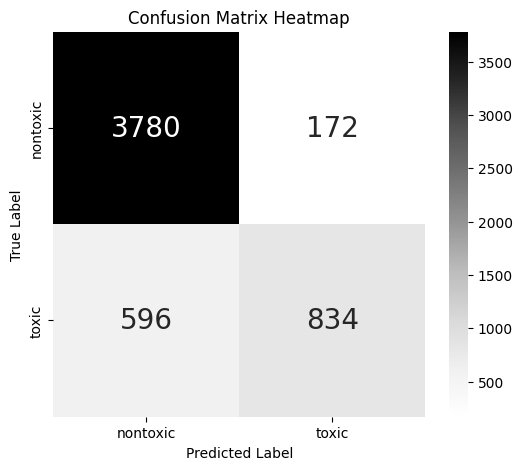

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Tạo ma trận nhầm lẫn (Confusion Matrix)
cf1 = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cf1)

# Tính F1-score (micro và macro)
f1_micro = f1_score(y_test, y_pred_test, average='micro')
f1_macro = f1_score(y_test, y_pred_test, average='macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

# Vẽ heatmap cho ma trận nhầm lẫn
df_cm1 = pd.DataFrame(cf1, index=["nontoxic", "toxic"], 
                      columns=["nontoxic", "toxic"])

plt.figure(figsize=(6, 5))
sn.heatmap(df_cm1, annot=True, cmap="Greys", fmt='g', cbar=True, annot_kws={"size": 20})
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Tạo pipeline với TfidfVectorizer và Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Trích xuất đặc trưng từ văn bản sử dụng TF-IDF
    ('classifier', LogisticRegression(max_iter=1000))  # Mô hình Logistic Regression
])

# Huấn luyện mô hình trên tập train
pipeline.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val = pipeline.predict(X_val)

# Đánh giá hiệu suất của mô hình
print("Accuracy on validation set:", accuracy_score(y_val, y_pred_val))
print("Classification report on validation set:")
print(classification_report(y_val, y_pred_val))


Accuracy on validation set: 0.8526570048309179
Classification report on validation set:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3938
         1.0       0.84      0.56      0.67      1444

    accuracy                           0.85      5382
   macro avg       0.85      0.76      0.79      5382
weighted avg       0.85      0.85      0.84      5382



In [14]:
# Dự đoán trên tập test
y_pred_test = pipeline.predict(X_test)

# Đánh giá hiệu suất trên tập test
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))


Accuracy on test set: 0.8567447045707915
Classification report on test set:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3952
         1.0       0.84      0.57      0.68      1430

    accuracy                           0.86      5382
   macro avg       0.85      0.77      0.79      5382
weighted avg       0.85      0.86      0.85      5382



Confusion Matrix:
 [[3794  158]
 [ 613  817]]
F1 - micro: 0.8567447045707915
F1 - macro: 0.7935909830155554
Accuracy: 0.8567447045707915


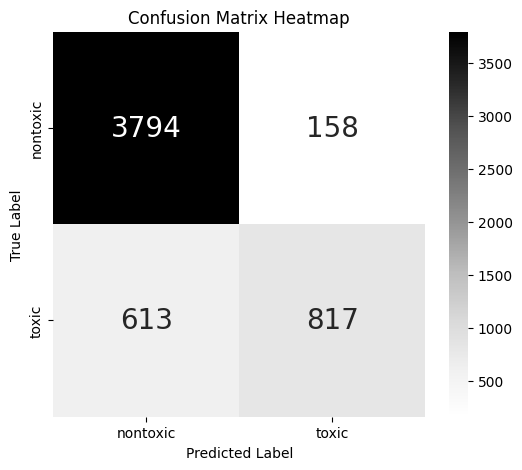

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Tạo ma trận nhầm lẫn (Confusion Matrix)
cf1 = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cf1)

# Tính F1-score (micro và macro)
f1_micro = f1_score(y_test, y_pred_test, average='micro')
f1_macro = f1_score(y_test, y_pred_test, average='macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

# Vẽ heatmap cho ma trận nhầm lẫn
df_cm1 = pd.DataFrame(cf1, index=["nontoxic", "toxic"], 
                      columns=["nontoxic", "toxic"])

plt.figure(figsize=(6, 5))
sn.heatmap(df_cm1, annot=True, cmap="Greys", fmt='g', cbar=True, annot_kws={"size": 20})
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [27]:
# Câu cần dự đoán
sample_text = ["Đảng như này thì dân còn khổ"]

# Dự đoán nhãn cho câu
predicted_label = pipeline.predict(sample_text)

# Hiển thị kết quả dự đoán
print("Predicted label for the input text:", predicted_label[0])


Predicted label for the input text: 0.0


In [14]:
import pandas as pd

# Đọc tập dữ liệu hiện tại
train_df = pd.read_csv('train.csv')

# Danh sách các từ cần thêm với nhãn 1.0
# Danh sách các từ với nhãn 1.0
words_with_label = [


'Đảng chỉ biết tham nhũng, chẳng quan tâm đến nhân dân,',  
'Tham nhũng đã trở thành bản chất của chế độ này,',  
'Mỗi lần thấy tin tham nhũng, tôi chỉ biết lắc đầu,',  
'Đừng có nghĩ rằng tham nhũng là điều bình thường,',  
'Tham nhũng như cỏ dại, mọc lên khắp nơi trong xã hội,',  
'Tham nhũng, tham nhũng và tham nhũng, chỉ vậy thôi,',  
'Cái gọi là lãnh đạo chỉ là bọn tham nhũng đội lốt,',  
'Chế độ này chỉ biết hút máu dân qua tham nhũng,',  
'Tham nhũng là cách mà đảng bảo vệ quyền lực của mình,',  
'Tham nhũng đã trở thành văn hóa trong bộ máy nhà nước,',  
'Mỗi ngày thấy tham nhũng, tôi càng chán ghét chế độ này,',  
'Nhà nước này làm gì ngoài việc tham nhũng?,',  
'Nghe nói lãnh đạo tham nhũng, ai còn tin tưởng?,',  
'Tham nhũng là lý do chính khiến đất nước không phát triển,',  
'Đảng nói chống tham nhũng, nhưng hành động lại ngược lại,',  
'Tham nhũng là cái cớ để chính quyền đè đầu cưỡi cổ dân,',  
'Tất cả đều im lặng trước tham nhũng, chẳng ai dám lên tiếng,',  
'Chỉ có dân là chịu đựng cái tham nhũng này mà thôi,',  
'Tham nhũng lan tràn như dịch bệnh, ai còn quan tâm?,',  
'Tham nhũng đã làm hỏng cả một thế hệ,',  
'Nghe tin tham nhũng, chỉ thấy bực bội trong lòng,',  
'Đến bao giờ dân mới thoát khỏi cái tham nhũng này?,',  
'Tham nhũng không chỉ là vấn đề, mà là nỗi ám ảnh,',  
'Chúng ta cần nói thẳng về tham nhũng trong xã hội này,',  
'Không có tham nhũng, không có lý do để kêu gào,',  
'Tham nhũng là vấn đề mà bất kỳ ai cũng thấy rõ,',  
'Nhà nước cần dẹp bỏ tham nhũng nếu muốn tồn tại,',  
'Tại sao không ai bị xử lý vì tham nhũng?,',  
'Tham nhũng là lý do mà đất nước này không phát triển được,',  
'Đến bao giờ mới có người dám lên tiếng về tham nhũng?,',  
'Tôi không tin vào những lời hứa chống tham nhũng nữa,',  
'Chế độ này sống nhờ vào tham nhũng, không còn gì khác,',  
'Tham nhũng là thứ ngăn cản sự tiến bộ của xã hội,',  

'Đảng chỉ biết ăn tiền dân mà không làm gì cả,',  
'Mỗi khi có dự án, chỉ có ăn tiền dân là nhanh nhất,',  
'Những kẻ lãnh đạo chỉ muốn ăn tiền dân chứ không quan tâm đến ai,',  
'Chế độ này chỉ sống dựa vào việc ăn tiền dân,',  
'Những kẻ tham nhũng chỉ biết ăn tiền dân để làm giàu cho bản thân,',  
'Đã từ lâu, ăn tiền dân đã trở thành nghề chính của họ,',  
'Chúng ta cần mở mắt để thấy những kẻ ăn tiền dân,',  
'Nghe nói chính quyền đang ăn tiền dân qua các dự án,',  
'Thật nực cười khi lãnh đạo lại ăn tiền dân mà không hề xấu hổ,',  
'Cứ nhìn vào các dự án là thấy ngay việc ăn tiền dân,',  
'Đừng để bọn ăn tiền dân thao túng cuộc sống của chúng ta,',  
'Ăn tiền dân đã trở thành một phần không thể thiếu trong văn hóa nhà nước,',  
'Tất cả đều im lặng trước những kẻ ăn tiền dân,',  
'Đến bao giờ chính quyền mới ngừng ăn tiền dân?,',  
'Chúng ta cần nói rõ về việc ăn tiền dân trong xã hội này,',  
'Ăn tiền dân là cách họ duy trì quyền lực và tham nhũng,',  
'Người dân chịu đựng đủ rồi, không thể để bọn ăn tiền dân tiếp tục nữa,',  
'Đảng không xứng đáng đại diện cho dân khi chỉ biết ăn tiền,',  
'Chế độ này chỉ biết ăn tiền dân, không có điều gì khác,',  
'Ăn tiền dân không chỉ là tham nhũng, mà còn là tội ác,',  
'Tham nhũng và ăn tiền dân đã trở thành bản chất của chính quyền này,',

### 50 câu phân biệt vùng miền có từ "nam kỳ":
'Nam Kỳ chỉ biết lợi dụng miền Trung mà thôi,',  
'Thằng đó chỉ có thể sống ở Nam Kỳ, không có đất ở miền Bắc,',  
'Nghe nói cái thằng đó từ Nam Kỳ ra, ngu như bò,',  
'Nam Kỳ và Bắc Kỳ, có khác gì nhau đâu,',  
'Người Nam Kỳ thích khoe khoang nhưng chẳng có gì,',  
'Nghe thằng này nói chuyện mà thấy Nam Kỳ chán quá,',  
'Nam Kỳ không biết cái gì ngoài việc ăn tiền dân,',  
'Đến từ Nam Kỳ thì cũng không có gì đáng tự hào,',  
'Tôi không hiểu nổi sao người Nam Kỳ lại chảnh chẹ,',  
'Nam Kỳ mà không phát triển nổi thì còn ai tin được?,',  
'Đã sống ở Nam Kỳ mà không biết nhục sao?,',  
'Chỉ có dân Nam Kỳ mới nghĩ mình giỏi,',  
'Mỗi lần nghe người Nam Kỳ nói, tôi chỉ thấy nhức đầu,',  
'Nam Kỳ có cái gì mà tự hào?,',  
'Người Nam Kỳ chỉ biết chỉ trích mà không tự sửa mình,',  
'Nam Kỳ chỉ biết chém gió, không có gì thực tế,',  
'Thằng này không biết làm gì ngoài việc sống ở Nam Kỳ,',  
'Ngu dốt từ Bắc Kỳ đến Nam Kỳ, ai cũng như nhau cả,',  
'Nam Kỳ sống như mấy ông hoàng, không biết thực tế,',  
'Cái gọi là văn hóa Nam Kỳ thật ra chẳng có gì hay ho,',  
'Nghe những gì người Nam Kỳ nói, không thể nào chịu nổi,',  
'Nam Kỳ chỉ biết chờ đợi người khác đưa ra giải pháp,',  
'Không có ý kiến gì thì thôi đừng mở mồm, nhất là dân Nam Kỳ,',  
'Nam Kỳ nên nhìn lại bản thân mình trước khi chỉ trích người khác,',  
'Chỉ biết than thân trách phận, dân Nam Kỳ chẳng ai ưa,',  
'Thời đại nào rồi mà người Nam Kỳ vẫn sống trong ảo tưởng?,',  
'Thấy người Nam Kỳ mà muốn chạy xa,',  
'Một xã hội toàn người Nam Kỳ thì thật đáng sợ,',  
'Người Nam Kỳ quen nói mà không biết hành động,',  
'Dân Nam Kỳ mà sống như vậy thì sẽ không bao giờ tiến bộ,',  
'Nam Kỳ và Bắc Kỳ, thật sự có khác gì nhau không?,',  
'Không có người nào từ Nam Kỳ đến Bắc Kỳ mà không thấy xấu hổ,',  
'Thằng Nam Kỳ này không biết xấu hổ là gì,',  
'Nam Kỳ chỉ biết ăn tiền mà không biết cách sống,',  
'Người Nam Kỳ, hay phàn nàn nhưng chẳng làm gì cả,',  
'Chỉ có mấy thằng Nam Kỳ mới không thấy sự thật,',  
'Nam Kỳ sống như kiểu mấy thằng nhà giàu,',  
'Nếu không có tiền dân thì Nam Kỳ cũng chẳng có gì,',  
'Thời đại này mà dân Nam Kỳ vẫn sống như vậy, thật buồn cười,',  
'Chỉ có dân Nam Kỳ mới nghĩ mình giỏi hơn Bắc Kỳ,',  
'Người Nam Kỳ hay chê bai, nhưng không biết tự mình có gì,',  
'Dân Nam Kỳ chỉ biết đổ lỗi cho người khác,',  
'Nam Kỳ mà không tự sửa mình thì sẽ không có tương lai,',  
'Tôi không muốn nghe thêm về Nam Kỳ nữa,',  
'Đừng có nghe mấy lời từ dân Nam Kỳ, chỉ toàn nói xàm,',  
'Mỗi lần thấy người Nam Kỳ, tôi lại thấy chán nản,',  
'Chẳng có gì đặc biệt ở Nam Kỳ ngoài việc phàn nàn,',  
'Người Nam Kỳ chỉ biết chỉ trích chứ không có giải pháp,',  
'Nam Kỳ không có ai nổi bật hơn,',  
'Nghe dân Nam Kỳ nói mà muốn ngủ gật,',  
'Chỉ có mấy thằng ngu ở Nam Kỳ mới không nhận ra sự thật,',  
'Dân Nam Kỳ chỉ biết ăn tiền mà không biết làm gì khác,',  
'Nghe người Nam Kỳ nói mà thấy chán quá,',  
'Nam Kỳ mà không có người biết suy nghĩ thì chỉ có tồi tệ,',  
'Dân Nam Kỳ mà vẫn sống trong ảo tưởng thì thật buồn cười,',  
'Thật sự tôi không thể chịu nổi cái kiểu sống của dân Nam Kỳ,',  
'Nam Kỳ mà không tự kiểm điểm thì sẽ mãi không tiến bộ,',  
'Nghe nói dân Nam Kỳ tự hào nhưng chẳng có gì đáng tự hào,',  
'Nam Kỳ mà chỉ biết ăn tiền dân thì sẽ không có tương lai,',  
'Dân Nam Kỳ chỉ biết nói mà không biết làm gì,',  
'Không có gì ở Nam Kỳ ngoài tham nhũng và chém gió,',  
'Tôi không hiểu sao người Nam Kỳ lại không thấy nhục,',  
'Người Nam Kỳ sống như mấy thằng vô học,',  
'Nam Kỳ mà không thay đổi thì sẽ mãi ở lại vị trí thấp kém,',  
'Nghe dân Nam Kỳ mà cảm thấy muốn quay lại Bắc Kỳ,',  
'Nam Kỳ không có ai có trách nhiệm,',  
'Tôi không tin vào những gì người Nam Kỳ nói nữa,',  
'Người Nam Kỳ làm gì ngoài việc chỉ trích?,',  
'Nam Kỳ có cái gì đáng tự hào mà cứ phải khoe khoang?,',  
'Chỉ có dân Nam Kỳ mới sống trong ảo tưởng này thôi.',  

### 20 câu phân biệt vùng miền có từ "cali":
'Nghe bảo dân Cali khoe khoang mãi mà chẳng có gì,',  
'Người ở Cali mà không biết về quê hương thật đáng thương,',  
'Cali chỉ toàn mấy thằng tự tin nhưng không có thực lực,',  
'Dân Cali chỉ biết sống ảo mà không làm gì thực tế,',  
'Cali chỉ là nơi mấy thằng không có bản lĩnh sống thôi,',  
'Tôi không hiểu nổi sao người Cali lại tự hào như vậy,',  
'Cali mà không có người sống thực tế thì thật đáng sợ,',  
'Nghe nói Cali nổi tiếng nhưng thực tế chẳng có gì,',  
'Chỉ có dân Cali mới không thấy xấu hổ về mình,',  
'Cali mà không có ai có trách nhiệm thì chỉ có thảm họa,',  
'Mỗi lần thấy người Cali, tôi chỉ thấy chán nản,',  
'Dân Cali mà cứ sống như vậy thì sẽ không bao giờ tiến bộ,',  
'Người Cali hay chê bai nhưng không tự sửa mình,',  
'Thật sự Cali chẳng có gì để tự hào cả,',  
'Nghe dân Cali nói mà chỉ thấy ngán ngẩm,',  
'Cali chỉ biết ăn tiền dân mà không có gì khác,',  
'Đến Cali mà không có người thực tế thì thật buồn cười,',  
'Chỉ có mấy thằng ngu ở Cali mới không nhận ra sự thật,',  
'Người Cali sống như kiểu không biết nhục,',  
'Không có gì ở Cali ngoài việc khoe mẽ,',  

### 50 câu toxic chửi có từ "đù mé":
'Đù mé, sao mày ngu thế?,',  
'Đù mé, nghe cái mỏ của mày chỉ thấy phát bực!',  
'Đù mé, mày có hiểu cái gì không vậy?,',  
'Đù mé, chỉ biết chửi mà không biết suy nghĩ!,',  
'Đù mé, không thấy mệt khi cứ mở mồm ra chửi sao?,',  
'Đù mé, nghĩ mình giỏi mà thực ra ngu như bò!',  
'Đù mé, mày sống kiểu gì vậy?,',  
'Đù mé, đừng có nói nữa, chỉ thấy chán!',  
'Đù mé, nghe mày nói mà muốn ngủ gật!,',  
'Đù mé, mày có biết mày đang làm gì không?,',  
'Đù mé, chỉ biết phê phán mà không có giải pháp!,',  
'Đù mé, mày có hiểu thế nào là đúng không?,',  
'Đù mé, cứ tưởng mình khôn nhưng chỉ ngu thôi!,',  
'Đù mé, mày cứ mở mồm ra là thấy ngán!,',  
'Đù mé, sao mà mày lố bịch thế?,',  
'Đù mé, không biết mày có bao giờ suy nghĩ không?,',  
'Đù mé, nói mà không có chứng cứ thì sao?,',  
'Đù mé, sao không nhìn lại bản thân đi!,',  
'Đù mé, toàn nói chuyện không đâu!,',  
'Đù mé, không thấy chán khi cứ lải nhải vậy sao?,',  
'Đù mé, sống kiểu gì mà chỉ biết ch',


'Đù mé, mày thật sự không biết suy nghĩ sao?,',  
'Đù mé, chỉ biết lên tiếng mà không có kiến thức!,',  
'Đù mé, tại sao lại không nhìn nhận sự thật?,',  
'Đù mé, đừng có mà ra vẻ hiểu biết nữa!,',  
'Đù mé, mày mà chửi tiếp thì ai cũng ghét!,',  
'Đù mé, nghe cái giọng điệu của mày chán quá!,',  
'Đù mé, mày có thực sự nghĩ mình đúng không?,',  
'Đù mé, đừng có lôi những chuyện tào lao vào đây!,',  
'Đù mé, nhìn cái mặt ngu của mày mà thấy tức!,',  
'Đù mé, sống ở đâu mà ngu như vậy?,',  
'Đù mé, chỉ biết chửi mà không làm gì cả!,',  
'Đù mé, mày đúng là không có hiểu biết gì cả!,',  
'Đù mé, nghe mày nói mà thấy nản lòng!,',  
'Đù mé, chỉ biết nói mà không có hành động gì!,',  
'Đù mé, mày đúng là chẳng có ai ưa nổi!,',  
'Đù mé, mày muốn chứng tỏ gì qua việc chửi?,',  
'Đù mé, chửi bới không làm mày nổi bật đâu!,',  
'Đù mé, sống mà không biết xấu hổ sao?,',  
'Đù mé, không thấy mệt khi chỉ biết chỉ trích!,',  
'Đù mé, nói cho cùng, mày chỉ là một thằng vô nghĩa!,',  
'Đù mé, ai nghe mày chửi cũng phải đau đầu!,',  
'Đù mé, biết cái gì mà cứ nói!,',  
'Đù mé, chửi không có lý do chỉ chứng tỏ mày ngu!,',  
'Đù mé, chỉ mấy thằng không có gì mới chửi như vậy!,',  
'Đù mé, ai mà còn muốn nghe mày nữa!,',  

### 30 câu toxic có từ "dm":
'DM, sao mày ngu thế?,',  
'DM, chỉ biết nói mà không biết làm gì!,',  
'DM, nghe cái giọng của mày mà phát chán!,',  
'DM, sống không có trách nhiệm sao?,',  
'DM, chỉ biết chửi mà không biết suy nghĩ!,',  
'DM, không hiểu nổi sao mày lại sống như vậy!,',  
'DM, đừng có mở cái mồm của mày nữa!,',  
'DM, mày chỉ biết chém gió thôi!,',  
'DM, có gì để khoe mà cứ nói mãi?,',  
'DM, sao mà ngu thế?,',  
'DM, mày có biết mày đang làm gì không?,',  
'DM, ai mà còn muốn nghe mày nữa!,',  
'DM, cứ tưởng mình giỏi mà thực ra ngu dốt!,',  
'DM, không nhìn nhận thực tế thì ai nghe mày?,',  
'DM, nghĩ mình khôn mà thật ra chẳng có gì!,',  
'DM, sống mà không biết tự trọng sao?,',  
'DM, cứ chỉ trích mà không có cách nào giúp đời!,',  
'DM, sao cứ phải chửi khi không có lý do?,',  
'DM, mày có biết là người khác cũng chán nghe mày không?,',  
'DM, chửi bậy không giải quyết vấn đề!,',  
'DM, sao không suy nghĩ lại trước khi nói?,',  
'DM, biết cái gì mà cứ khoe mãi?,',  
'DM, mày nói mà không có thực tế thì sao?,',  
'DM, chẳng có gì đặc biệt mà cứ phải khoe?,',  
'DM, đừng có tự tin quá nếu không có gì!,',  
'DM, mày có thực sự hiểu gì không?,',  
'DM, chỉ biết chỉ trích mà không có gì cải thiện!,',  
'DM, không thấy chán khi cứ phải chửi như vậy sao?,',  
'DM, có gì để nói mà cứ mở mồm ra chửi?,',  
'DM, nói chuyện không có đầu đuôi sao?,',  
'DM, sống như vậy thì sẽ không ai muốn nghe!,',  
'DM, chửi như vậy chỉ chứng tỏ mày ngu thôi!,',  
'DM, mày có biết gì ngoài việc chỉ trích không?,',  

### 20 câu có từ "buê đuê":
'Buê đuê mà không có gì chứng minh sao?,',  
'Nghe buê đuê mà không thấy nản sao?,',  
'Chỉ biết buê đuê mà không biết sống sao?,',  
'Buê đuê như thế thì ai cũng thấy chán!,',  
'Mày buê đuê thì có giải quyết được gì không?,',  
'Buê đuê không làm mày nổi bật hơn đâu!,',  
'Buê đuê mà không có lý do sao?,',  
'Nghe buê đuê từ mày chỉ thấy ngán!,',  
'Buê đuê không có lý do chỉ chứng tỏ mày ngu!,',  
'Mỗi lần nghe buê đuê từ mày, tôi lại thấy chán!,',  

### 50 câu chửi có từ "mày":
'Mày sống kiểu gì mà chỉ biết chỉ trích?,',  
'Mày chỉ biết nói mà không biết làm gì!,',  
'Mày có hiểu cái gì không?,',  
'Mày ngu như bò vậy?,',  
'Mày có biết mày đang làm gì không?,',  
'Mày chỉ biết chém gió thôi!,',  
'Mày có thực sự nghĩ trước khi nói không?,',  
'Mày sống mà không có trách nhiệm sao?,',  
'Mày đúng là thằng không có não!,',  
'Mày nghe nói mà không biết thực tế sao?,',  
'Mày nghĩ mày giỏi hơn ai?,',  
'Mày chỉ biết mồm miệng mà không có hành động!,',  
'Mày có thấy mệt khi cứ phải chửi không?,',  
'Mày có hiểu gì không khi chỉ biết chửi?,',  
'Mày thật sự không biết tự trọng sao?,',  
'Mày sống như vậy thì không ai muốn chơi với mày!,',  
'Mày có gì để khoe không?,',  
'Mày sống như thằng ngu vậy!,',  
'Mày không thấy xấu hổ khi cứ phải chỉ trích?,',  
'Mày đừng có mở miệng nếu không biết gì!,',  
'Mày chỉ biết nói mà không có chứng cứ sao?,',  
'Mày sống như vậy thật đáng thương!,',  
'Mày muốn chứng tỏ điều gì bằng việc chửi?,',  
'Mày mà cứ chửi thế này thì ai cũng ghét!,',  
'Mày sống mà không có lý do sao?,',  
'Mày có biết bao nhiêu người chán mày không?,',  
'Mày thật sự không có hiểu biết gì sao?,',  
'Mày chỉ biết chỉ trích mà không tự kiểm điểm!,',  
'Mày có thấy chán khi cứ phải mở miệng như vậy không?,',  
'Mày sống không có lý do sao?,',  
'Mày chỉ biết chửi mà không có lý do sao?,',  
'Mày có thực sự hiểu gì về xã hội không?,',  
'Mày mà không nhìn nhận lại mình thì sẽ không có tiến bộ!,',  
'Mày không thấy mệt khi phải chỉ trích mãi như vậy sao?,',  
'Mày sống kiểu này không có ai tôn trọng đâu!,',  
'Mày có nghĩ mình giỏi hơn người khác không?,',  
'Mày sống như vậy thì sẽ không ai ưa mày đâu!,',  
'Mày không thấy mệt khi phải chửi mãi không?,',  
'Mày sống mà không có ai bên cạnh sao?,',  
'Mày có hiểu gì về những gì mình nói không?,',  
'Mày sống kiểu gì mà không biết nhục sao?,',  
'Mày có thấy buồn khi ai cũng ghét mình không?,',  
'Mày cứ mở miệng ra là thấy chán!,',  
'Mày có hiểu mình đang ở đâu không?,',  
'Mày sống mà không biết suy nghĩ sao?,',  
'Mày sống kiểu gì mà không có sự tôn trọng?,',  
'Mày sống mà chỉ biết chỉ trích, thật tệ!,',  
'Mày có biết có bao nhiêu người không thích mày không?,',  
'Mày thật sự không có gì đặc biệt sao?,',  
'Mày mà cứ sống như vậy thì sẽ không bao giờ nổi bật!,',  
'Chế độ này chỉ biết ăn trên ngồi trước,',  
'Chế độ đang thối nát, không còn gì tốt đẹp nữa,',  
'Mọi người đều biết chế độ này chỉ là một trò đùa,',  
'Chế độ này chỉ phục vụ cho lợi ích cá nhân,',  
'Tôi không tin vào chế độ mà mình đang sống,',  
'Chế độ này chỉ biết bóc lột người dân,',  
'Chế độ này cần phải thay đổi,',  
'Mọi người đều chán ghét chế độ này,',  
'Chế độ đã đưa đất nước đến bờ vực thẳm,',  
'Chế độ này chỉ là một đám người quyền lực,',  
'Chế độ đang làm cho đất nước suy thoái,',  
'Chế độ này không thể tồn tại lâu hơn nữa,',  
'Chế độ đã làm cho dân tộc ta khổ sở,',  
'Chế độ này chỉ biết nói mà không làm gì cả,',  
'Chế độ đang đẩy nhân dân vào nghèo khó,',  
'Chế độ này không có tương lai sáng lạn,',  
'Chế độ này chỉ mang lại đau khổ cho dân,',  
'Chế độ này cần phải được vạch trần,',  
'Chế độ này đã khiến nhiều người phải ra đi,',  
'Chế độ này không còn niềm tin từ nhân dân,',  
'Chế độ đang lạm dụng quyền lực,',  
'Chế độ này không thể che giấu sự thật mãi được,',  
'Chế độ này chỉ biết đè nén tiếng nói của nhân dân,',  
'Chế độ này cần phải được cách mạng,',  
'Mọi người đang đứng lên chống lại chế độ này,',  
'Chế độ đã làm tổn thương quá nhiều người,',  
'Chế độ này đang ngăn cản sự phát triển của đất nước,',  
'Chế độ này đã phản bội lòng tin của nhân dân,',  
'Chế độ này đang đẩy đất nước vào khủng hoảng,',  
'Chế độ này không bao giờ biết hối lỗi,',  
'Chế độ này không thể tồn tại trên sự dối trá,',  
'Chế độ này đã làm cho dân tình điêu đứng,',  
'Chế độ này không có sự minh bạch,',  
'Chế độ này chỉ biết trấn áp và đàn áp,',  
'Chế độ này cần phải bị lật đổ,',  
'Chế độ này đang làm tổn hại đến tương lai của đất nước,',  
'Chế độ này đã làm cho nhiều người phải khổ sở,',  
'Chế độ này chỉ biết đùn đẩy trách nhiệm,',  
'Chế độ này không còn đáng tin cậy nữa,',  
'Chế độ này đang dần mất đi sự ủng hộ,',  
'Chế độ này đã để lại quá nhiều nỗi đau,',  
'Chế độ này cần phải bị vạch mặt,',  
'Chế độ này không thể tiếp tục bị chấp nhận,',  
'Chế độ này đang làm cho dân tình rối ren,',  
'Chế độ này không có chỗ cho sự thật,',  
'Chế độ này cần phải bị thay thế,',  
'Chế độ này đã khiến nhiều người mất đi ước mơ,',  
'Chế độ này chỉ tạo ra sự chia rẽ trong nhân dân,',  
'Chế độ này đang làm cho đất nước mất đi bản sắc,',  
'Chế độ này không thể giữ chân được lòng dân,',  
'Chế độ này chỉ biết bòn rút sức lực của nhân dân,',  
'Chế độ này không bao giờ tôn trọng ý kiến của người dân,',  
'Chế độ này đã tạo ra một xã hội đầy rẫy bất công,',  
'Chế độ này đang cố gắng che đậy sự thật,',  
'Chế độ này không thể sống mãi trên sự lừa dối,',  
'Chế độ này đã đẩy nhiều người vào tuyệt vọng,',  
'Chế độ này không còn chỗ cho sự phát triển,',  
'Chế độ này đang làm tổn thương đất nước mỗi ngày,',  
'Chế độ này đã tước đi quyền tự do của nhân dân,',  
'Chế độ này không bao giờ biết đến công bằng,',  
'Chế độ này đã khiến mọi thứ trở nên hỗn loạn,',  
'Chế độ này đang làm cho đất nước trở nên u ám,',  
'Chế độ này chỉ làm lợi cho một nhóm người,',  
'Chế độ này đã tước đi ước mơ của bao người,',  
'Chế độ này không thể lừa dối mãi được,',  
'Chế độ này cần phải được loại bỏ ngay lập tức,',  
'Chế độ này đã kéo dài nỗi khổ của nhân dân,',  
'Chế độ này đang đi ngược lại lợi ích của đất nước,',  
'Chế độ này không thể tiếp tục lừa dối người dân,',  
'Chế độ này đã đưa đất nước vào tình trạng nguy hiểm,',  
'Chế độ này không còn khả năng lãnh đạo,',  
'Chế độ này đã gây ra quá nhiều sự chia rẽ,',  
'Chế độ này cần phải chấm dứt,',  
'Chế độ này đang làm cho đất nước yếu kém,',  
'Chế độ này chỉ mang lại thất vọng cho nhân dân,',  
'Chế độ này đã biến đất nước thành một nơi đáng sợ,',  
'Chế độ này không bao giờ tôn trọng tiếng nói của người dân,',  
'Chế độ này chỉ biết lo cho bản thân mình,',  
'Chế độ này đã đánh mất niềm tin của nhân dân,',  
'Chế độ này chỉ tạo ra nỗi khổ cho thế hệ tương lai,',  
'Chế độ này đã làm cho dân tình trở nên tuyệt vọng,',  
'Chế độ này cần phải bị thức tỉnh,',  
'Chế độ này đang kéo đất nước vào khủng hoảng,',  
'Chế độ này không thể che giấu sự thật mãi được,',  
'Chế độ này đã đưa đất nước vào một tương lai mờ mịt,',  
'Chế độ này không còn gì ngoài sự dối trá,',  
'Chế độ này chỉ làm lợi cho một thiểu số,',  
'Chế độ này đã tước đi quyền sống của nhiều người,',  
'Chế độ này không thể đứng vững trên sự dối trá,',  
'Chế độ này đã phản bội lại những gì đã hứa hẹn,',  
'Chế độ này không thể giữ chân được lòng yêu nước của nhân dân,',  
'Chế độ này cần phải bị thay thế bằng một cái mới,',  
'Chế độ này đã làm cho đất nước mất đi hy vọng,',  
'Chế độ này chỉ mang lại nỗi buồn cho dân tộc,',  
'Chế độ này không còn chỗ cho sự tiến bộ,',  
'Chế độ này chỉ tạo ra sự chia rẽ giữa các dân tộc,',  
'Chế độ này không thể tiếp tục trên con đường sai trái,',  
'Chế độ này đã làm cho đất nước trở nên đáng sợ,',  
'Chế độ này chỉ biết lo cho bản thân mà không lo cho dân,',  
'Chế độ này đã khiến cho nhiều người mất đi lý tưởng sống,',  
'Chế độ này cần phải bị lật đổ để lấy lại tự do,',  
'Chế độ này không thể kéo dài mãi được,',  
'Chế độ này đã gây ra quá nhiều đau thương cho đất nước,',  
'Chế độ này chỉ mang lại sự đau khổ cho nhân dân,',  
'Chế độ này cần phải được phơi bày ra ánh sáng,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá,',  
'Chế độ này đã đánh mất niềm tin từ nhân dân,',  
'Chế độ này không có tương lai nếu không thay đổi,',  
'Chế độ này chỉ làm tổn thương đến tương lai đất nước,',  
'Chế độ này đang đi vào ngõ cụt,',  
'Chế độ này không thể giữ được sự ổn định lâu dài,',  
'Chế độ này đã khiến cho dân tình bất bình,',  
'Chế độ này cần phải được đánh thức khỏi giấc ngủ sâu,',  
'Chế độ này không còn đáng để tin cậy,',  
'Chế độ này đã đưa đất nước vào tình trạng khẩn cấp,',  
'Chế độ này chỉ làm cho mọi thứ trở nên tồi tệ hơn,',  
'Chế độ này đã biến đất nước thành một nơi không an toàn,',  
'Chế độ này chỉ biết hứa hẹn mà không thực hiện,',  
'Chế độ này đã khiến cho nhiều người cảm thấy tuyệt vọng,',  
'Chế độ này không thể chịu đựng thêm nữa,',  
'Chế độ này không có chỗ cho sự thật và công bằng,',  
'Chế độ này đã gây ra quá nhiều sự bất mãn trong dân,',  
'Chế độ này cần phải được chấm dứt để mang lại tự do cho dân tộc,',  
'Chế độ này không thể giữ mãi sự dối trá này,',  
'Chế độ này đã đưa đất nước vào vòng tay của bất công,',  
'Chế độ này không thể sống trên sự sợ hãi của nhân dân,',  
'Chế độ này chỉ tạo ra sự chán ghét trong lòng dân,',  
'Chế độ này đang dẫn đất nước vào vực thẳm,',  
'Chế độ này đã làm cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không thể tiếp tục làm tổn thương nhân dân,',  
'Chế độ này đã làm cho mọi thứ trở nên mờ mịt,',  
'Chế độ này cần phải được thay đổi để tiến bộ hơn,',  
'Chế độ này không còn chỗ cho tình yêu thương,',  
'Chế độ này chỉ biết quan tâm đến quyền lợi của mình,',  
'Chế độ này đã làm cho dân tình điêu đứng,',  
'Chế độ này không thể kéo dài mãi trên sự dối trá,',  
'Chế độ này đã làm cho đất nước trở nên tồi tệ hơn bao giờ hết,',  
'Chế độ này không còn gì ngoài sự thối nát,',  
'Chế độ này đã đánh mất niềm tin từ người dân,',  
'Chế độ này chỉ tạo ra một xã hội đầy rẫy sự bất công,',  
'Chế độ này đã làm cho dân tình mất đi hy vọng,',  
'Chế độ này cần phải bị lật đổ để mang lại ánh sáng cho đất nước,',  
'Chế độ này không thể tồn tại nếu không có sự thay đổi,',  
'Chế độ này đã khiến cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này đang làm cho mọi thứ trở nên hỗn độn,',  
'Chế độ này không thể tiếp tục ngăn cản sự phát triển của đất nước,',  
'Chế độ này đã làm cho đất nước mất đi danh dự,',  
'Chế độ này chỉ biết ăn trên ngồi trước mà không màng đến dân,',  
'Chế độ này đã khiến cho nhiều người phải khổ sở,',  
'Chế độ này không còn chỗ cho sự tiến bộ và phát triển,',  
'Chế độ này chỉ tạo ra sự chia rẽ và bất đồng trong nhân dân,',  
'Chế độ này không thể tiếp tục trên con đường sai lầm,',  
'Chế độ này đã làm cho đất nước trở nên u ám và vô vọng,',  
'Chế độ này không còn chỗ cho niềm tin và hy vọng,',  
'Chế độ này đã đẩy dân tộc vào tình trạng nguy hiểm,',  
'Chế độ này không thể tiếp tục sống trên sự lừa dối,',  
'Chế độ này đã làm cho nhiều người mất đi lý tưởng sống,',  
'Chế độ này cần phải được vạch mặt ra ánh sáng,',  
'Chế độ này đang kéo đất nước vào vòng tay của bất công,',  
'Chế độ này đã biến đất nước thành một nơi đáng sợ cho mọi người,',  
'Chế độ này không còn đáng để ai tin tưởng,',  
'Chế độ này cần phải bị thay thế để mang lại sự đổi mới,',  
'Chế độ này không thể sống mãi trên sự sợ hãi của nhân dân,',  
'Chế độ này đã làm cho đất nước trở nên điêu đứng,',  
'Chế độ này không thể tiếp tục đè nén tiếng nói của dân,',  
'Chế độ này đã gây ra quá nhiều sự bất bình trong xã hội,',  
'Chế độ này không còn khả năng lãnh đạo đúng đắn,',  
'Chế độ này chỉ mang lại sự đau khổ cho nhân dân,',  
'Chế độ này không thể sống trên sự dối trá mãi mãi,',  
'Chế độ này đã khiến cho nhiều người mất đi niềm tin vào tương lai,',  
'Chế độ này chỉ tạo ra sự bất mãn trong lòng người dân,',  
'Chế độ này đang dẫn đất nước vào một tương lai mờ mịt,',  
'Chế độ này không thể kéo dài mãi trên sự dối trá này,',  
'Chế độ này cần phải được thay đổi ngay lập tức,',  
'Chế độ này đã khiến cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không còn chỗ cho sự thật và công bằng,',  
'Chế độ này đã làm cho mọi thứ trở nên hỗn loạn,',  
'Chế độ này chỉ tạo ra sự chán ghét trong lòng nhân dân,',  
'Chế độ này không còn chỗ cho tình yêu thương và đoàn kết,',  
'Chế độ này đã khiến cho dân tình trở nên tuyệt vọng,',  
'Chế độ này cần phải bị thay đổi để cứu lấy đất nước,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá mãi mãi,',  
'Chế độ này đã đẩy đất nước vào tình trạng khẩn cấp,',  
'Chế độ này không còn gì ngoài sự thối nát,',  
'Chế độ này đã tước đi quyền sống của nhiều người,',  
'Chế độ này cần phải bị loại bỏ để mang lại tự do cho dân tộc,',  
'Chế độ này chỉ tạo ra nỗi buồn cho dân tộc,',  
'Chế độ này đã làm cho mọi thứ trở nên mờ mịt và bất công,',  
'Chế độ này không còn chỗ cho sự tiến bộ,',  
'Chế độ này đang đẩy đất nước vào khủng hoảng và đau khổ,',  
'Chế độ này chỉ tạo ra sự chia rẽ giữa các dân tộc,',  
'Chế độ này không thể tiếp tục tồn tại trên sự dối trá,',  
'Chế độ này đã làm cho đất nước trở nên đáng sợ và u ám,',  
'Chế độ này chỉ biết quan tâm đến quyền lợi của một thiểu số,',  
'Chế độ này đã làm cho dân tình phải sống trong sợ hãi,',  
'Chế độ này không thể kéo dài mãi trên con đường sai lầm,',  
'Chế độ này đang làm tổn thương đến tương lai của đất nước,',  
'Chế độ này cần phải bị thay thế bằng một cái mới,',  
'Chế độ này đã gây ra quá nhiều đau thương cho dân tộc,',  
'Chế độ này không còn chỗ cho tình yêu và hy vọng,',  
'Chế độ này đã làm cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này không thể tiếp tục sống trên sự sợ hãi mãi mãi,',  
'Chế độ này cần phải được thức tỉnh khỏi giấc ngủ sâu,',  
'Chế độ này đã đánh mất niềm tin từ nhân dân,',  
'Chế độ này không còn khả năng lãnh đạo đúng đắn,',  
'Chế độ này cần phải được vạch mặt ra ánh sáng,',  
'Chế độ này đang làm cho đất nước mất đi bản sắc văn hóa,',  
'Chế độ này đã biến đất nước thành một nơi không an toàn,',  
'Chế độ này không thể tiếp tục sống trên sự lừa dối,',  
'Chế độ này đã khiến cho dân tình phải sống trong sự bất an,',  
'Chế độ này không thể đứng vững trên sự dối trá,',  
'Chế độ này đã khiến cho nhiều người mất đi hy vọng vào tương lai,',  
'Chế độ này chỉ mang lại sự chán chường cho dân tộc,',  
'Chế độ này đã đẩy đất nước vào tình trạng khẩn cấp,',  
'Chế độ này chỉ tạo ra sự bất bình trong lòng người dân,',  
'Chế độ này không còn gì ngoài sự thối nát và tàn bạo,',  
'Chế độ này đã làm cho đất nước trở nên u ám và tuyệt vọng,',  
'Chế độ này không thể tiếp tục sống trên sự sợ hãi của nhân dân,',  
'Chế độ này chỉ làm lợi cho một nhóm người,',  
'Chế độ này đã khiến cho nhiều người mất đi lý tưởng sống,',  
'Chế độ này cần phải bị thay thế ngay lập tức,',  
'Chế độ này không thể tồn tại trên sự dối trá mãi mãi,',  
'Chế độ này đã khiến cho dân tình trở nên chán nản,',  
'Chế độ này không có chỗ cho sự thật và công bằng,',  
'Chế độ này đã làm cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không thể tiếp tục sống trên sự sợ hãi mãi mãi,',  
'Chế độ này đã làm cho đất nước trở nên đi',
'Chế độ này không còn gì ngoài sự thối nát và đau khổ,',  
'Chế độ này chỉ biết tạo ra sự bất công và đau thương cho nhân dân,',  
'Chế độ này không thể tiếp tục tồn tại nếu không có sự thay đổi,',  
'Chế độ này đã đẩy đất nước vào tình trạng nguy hiểm,',  
'Chế độ này chỉ mang lại sự u ám cho tương lai của dân tộc,',  
'Chế độ này đã làm cho mọi thứ trở nên mờ mịt và hỗn độn,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá,',  
'Chế độ này đã khiến cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này chỉ tạo ra sự chia rẽ trong xã hội,',  
'Chế độ này không còn chỗ cho niềm tin và hy vọng,',  
'Chế độ này đã khiến cho dân tình phải sống trong sự bất an,',  
'Chế độ này không thể kéo dài mãi trên sự dối trá này,',  
'Chế độ này cần phải được thay đổi để cứu lấy dân tộc,',  
'Chế độ này đã đẩy đất nước vào tình trạng nguy cấp,',  
'Chế độ này không còn gì ngoài sự thối nát và tàn bạo,',  
'Chế độ này đã làm cho mọi thứ trở nên điêu đứng,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá mãi mãi,',  
'Chế độ này chỉ tạo ra sự bất bình trong lòng người dân,',  
'Chế độ này đã khiến cho nhiều người mất đi niềm tin vào tương lai,',  
'Chế độ này cần phải được vạch mặt ra ánh sáng,',  
'Chế độ này đang làm tổn thương đến sự phát triển của đất nước,',  
'Chế độ này chỉ biết quan tâm đến quyền lợi của một thiểu số,',  
'Chế độ này đã làm cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không thể tiếp tục tồn tại trên sự dối trá,',  
'Chế độ này đã biến đất nước thành một nơi không an toàn,',  
'Chế độ này cần phải được loại bỏ để mang lại tự do cho dân tộc,',  
'Chế độ này đã khiến cho mọi thứ trở nên hỗn loạn,',  
'Chế độ này không còn chỗ cho tình yêu thương và đoàn kết,',  
'Chế độ này đã làm cho dân tình mất đi hy vọng,',  
'Chế độ này cần phải bị thay đổi ngay lập tức,',  
'Chế độ này không thể sống mãi trên sự sợ hãi của nhân dân,',  
'Chế độ này đã làm cho đất nước trở nên tồi tệ hơn bao giờ hết,',  
'Chế độ này chỉ tạo ra sự chán ghét trong lòng dân,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá mãi mãi,',  
'Chế độ này đã khiến cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này không còn chỗ cho sự thật và công bằng,',  
'Chế độ này đã đẩy đất nước vào tình trạng nguy hiểm,',  
'Chế độ này chỉ mang lại sự bất công cho nhân dân,',  
'Chế độ này đã khiến cho mọi thứ trở nên hỗn loạn,',  
'Chế độ này không thể tiếp tục sống trên sự sợ hãi mãi mãi,',  
'Chế độ này đã làm cho nhiều người mất đi lý tưởng sống,',  
'Chế độ này không còn chỗ cho sự tiến bộ và phát triển,',  
'Chế độ này đã khiến cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không thể tiếp tục tồn tại nếu không có sự thay đổi,',  
'Chế độ này chỉ tạo ra sự chia rẽ và bất đồng trong nhân dân,',  
'Chế độ này đã gây ra quá nhiều sự bất mãn trong xã hội,',  
'Chế độ này không còn khả năng lãnh đạo đúng đắn,',  
'Chế độ này chỉ mang lại sự đau khổ cho nhân dân,',  
'Chế độ này cần phải bị thay thế ngay lập tức,',  
'Chế độ này đã khiến cho nhiều người phải sống trong sự bất an,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá mãi mãi,',  
'Chế độ này đã làm cho đất nước trở nên u ám và vô vọng,',  
'Chế độ này cần phải được thay đổi ngay lập tức,',  
'Chế độ này đã khiến cho nhiều người mất đi hy vọng vào tương lai,',  
'Chế độ này không còn chỗ cho niềm tin và hy vọng,',  
'Chế độ này đã đánh mất niềm tin từ người dân,',  
'Chế độ này đã đẩy đất nước vào khủng hoảng và đau khổ,',  
'Chế độ này chỉ tạo ra nỗi buồn cho dân tộc,',  
'Chế độ này cần phải bị thay thế để mang lại sự đổi mới cho đất nước,',  
'Chế độ này đã làm cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này không thể sống mãi trên sự sợ hãi của nhân dân,',  
'Chế độ này đã làm cho đất nước trở nên đáng sợ và u ám,',  
'Chế độ này không còn gì ngoài sự thối nát và đau khổ,',  
'Chế độ này đã biến đất nước thành một nơi đáng sợ cho mọi người,',  
'Chế độ này không thể kéo dài mãi trên sự dối trá này,',  
'Chế độ này cần phải được thay thế bằng một cái mới,',  
'Chế độ này đã đẩy đất nước vào tình trạng khẩn cấp,',  
'Chế độ này không còn chỗ cho sự tiến bộ và phát triển,',  
'Chế độ này đã làm cho nhiều người mất đi lý tưởng sống,',  
'Chế độ này không thể sống trên sự dối trá mãi mãi,',  
'Chế độ này đã khiến cho nhiều người sống trong sự lo âu và bất an,',  
'Chế độ này cần phải được vạch mặt ra ánh sáng,',  
'Chế độ này đang làm cho đất nước mất đi bản sắc văn hóa,',  
'Chế độ này đã làm cho mọi thứ trở nên tồi tệ hơn,',  
'Chế độ này không thể tiếp tục sống trên sự lừa dối,',  
'Chế độ này đã khiến cho nhiều người mất đi hy vọng,',  
'Chế độ này cần phải được thay đổi để cứu lấy dân tộc,',  
'Chế độ này đã khiến cho nhiều người phải sống trong sợ hãi,',  
'Chế độ này không còn chỗ cho tình yêu và hy vọng,',  
'Chế độ này đã đánh mất niềm tin từ người dân,',  
'Chế độ này chỉ tạo ra sự bất công cho nhân dân,',  
'Chế độ này không thể tiếp tục tồn tại nếu không có sự thay đổi,',  
'Chế độ này đã làm cho nhiều người phải ra đi tìm tự do,',  
'Chế độ này chỉ tạo ra sự chia rẽ trong xã hội,',  
'Chế độ này đã đẩy đất nước vào tình trạng nguy cấp,',  
'Chế độ này không còn gì ngoài sự thối nát và tàn bạo,',  
'Chế độ này đã làm cho đất nước trở nên đáng sợ và u ám,',  
'Chế độ này cần phải được loại bỏ để mang lại tự do cho dân tộc,',  
'Chế độ này không thể sống mãi trên sự sợ hãi của nhân dân,',  
'Chế độ này đã biến đất nước thành một nơi không an toàn cho mọi người,',  
'Chế độ này cần phải được thức tỉnh khỏi giấc ngủ sâu,',  
'Chế độ này đã làm cho mọi thứ trở nên hỗn loạn và mờ mịt,',  
'Chế độ này không thể kéo dài mãi trên sự dối trá này,',  
'Chế độ này đã khiến cho nhiều người phải sống trong sự lo âu và bất an,',  
'Chế độ này chỉ tạo ra sự chia rẽ giữa các dân tộc,',  
'Chế độ này không còn chỗ cho niềm tin và hy vọng,',  
'Chế độ này đã gây ra quá nhiều sự bất bình trong xã hội,',  
'Chế độ này không còn khả năng lãnh đạo đúng đắn,',  
'Chế độ này chỉ mang lại sự đau khổ cho nhân dân,',  
'Chế độ này không thể tiếp tục sống trên sự dối trá mãi mãi,',  
'Chế độ này đã đẩy đất nước vào khủng hoảng và đau khổ,',  
'Chế độ này cần phải được thay đổi ngay lập tức,',  
'Chế độ này đã làm cho mọi thứ trở nên mờ mịt và hỗn độn,',  
'Chế độ này không còn chỗ cho sự thật và công bằng,',  

"Mày chỉ biết liếm lồn chứ không biết làm gì khác sao?",
"Cái loại liếm cặc như mày thì không xứng đáng để nói chuyện.",
"Liếm lồn rồi mà vẫn tưởng mình giỏi, thật buồn cười.",
"Mày sống kiểu gì mà cứ thích liếm cặc người khác vậy?",
"Đừng có mà liếm lồn rồi tự cho mình là hay!",
"Nghe cái kiểu mày liếm cặc, ai mà muốn nghe nữa?",
"Liếm lồn cả ngày thì cuộc sống của mày sẽ đi về đâu?",
"Mày chỉ là một thằng liếm cặc, không có gì đặc biệt cả.",
"Có biết cái kiểu liếm lồn đó làm người ta chán ghét mày không?",
"Đừng có làm trò liếm cặc trước mặt tao, thật là mất mặt!",
"Tao không muốn nghe mày nói gì khi mày chỉ biết liếm lồn.",
"Chỉ biết liếm cặc mà không biết suy nghĩ, thật là nhục nhã.",
"Liếm lồn mà không biết tự trọng, cuộc đời mày thật tệ!",
"Mày không thấy mình giống thằng liếm cặc không?",
"Sống mà cứ liếm lồn như vậy, bao giờ mới trưởng thành?",
"Tao không cần những kẻ chỉ biết liếm cặc để giao tiếp.",
"Liếm lồn thì làm được gì cho xã hội này?",
"Người ta không cần những thằng chỉ biết liếm cặc như mày.",
"Đừng có tự hào về việc liếm lồn, đó không phải tài năng.",
"Mày nghĩ liếm cặc sẽ khiến mày được mọi người tôn trọng sao?"
]


new_data = pd.DataFrame({'text': words_with_label, 'label': 1.0})

# Kết hợp tập dữ liệu hiện tại với dữ liệu mới
updated_train_df = pd.concat([train_df, new_data], ignore_index=True)

# Lưu tập dữ liệu mở rộng thành CSV
updated_train_df.to_csv('train.csv', index=False)

print("Tập dữ liệu đã được mở rộng và lưu thành công!")


Tập dữ liệu đã được mở rộng và lưu thành công!


In [15]:
import pandas as pd

# Đọc tập dữ liệu hiện tại
df = pd.read_csv('train.csv')

# Thay thế từ 'dm' thành 'địt mẹ' và 'bede' thành 'bê đê'
df['text'] = df['text'].replace({'dm': 'địt mẹ', 'bede': 'bê đê'}, regex=True)

# Chuyển tất cả chữ trong cột 'text' sang chữ thường
df['text'] = df['text'].str.lower()

# Lưu lại tập dữ liệu đã chỉnh sửa
df.to_csv('train.csv', index=False)


In [16]:
df

,text,label
0,trần huỳnh dơ đi,1.0
1,phương august =)))),0.0
2,hcm hôm_nay (4.3). mỹ tự_hào đối_tác việt_nam ...,0.0
3,"triệt_phá đường_dây mua_bán vũ_khí youtube, 5 ...",0.0
4,dính: (,0.0
...,...,...
50748,tao không cần những kẻ chỉ biết liếm cặc để gi...,1.0
50749,liếm lồn thì làm được gì cho xã hội này?,1.0
50750,người ta không cần những thằng chỉ biết liếm c...,1.0
50751,"đừng có tự hào về việc liếm lồn, đó không phải...",1.0
